In [11]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.python.keras.models import Model


### **Création du générateur**

In [16]:
base_sure_directory = '/Users/alyazouzou/Desktop/ChallengeIA/base_sure'

In [ ]:
def extract_label_from_filename(filename):
    vote = filename.split('-')[1] 
    label = int(vote.split('_')[0]) 
    return label

In [20]:
class ImageLabelGenerator(object):
    def __init__(self, image_dir, batch_size=32, target_size=(224, 224), shuffle=True):
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.image_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
        self.on_epoch_end()

    def __len__(self):
        # Retourne le nombre de lots par époque
        return int(np.floor(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        # Génère un lot de données
        batch_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []

        for filename in batch_filenames:
            # Charger l'image
            img_path = os.path.join(self.image_dir, filename)
            image = tf.keras.utils.load_img(img_path, target_size=self.target_size)
            image = tf.keras.utils.img_to_array(image)
            #image = tf.keras.utils.img_to_array(image)
            #image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

            # Extraire le label
            label = extract_label_from_filename(filename)

            images.append(image)
            labels.append(label)

        # Convertir en numpy arrays
        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            # Mélanger les fichiers à la fin de chaque époque
            np.random.shuffle(self.image_filenames)

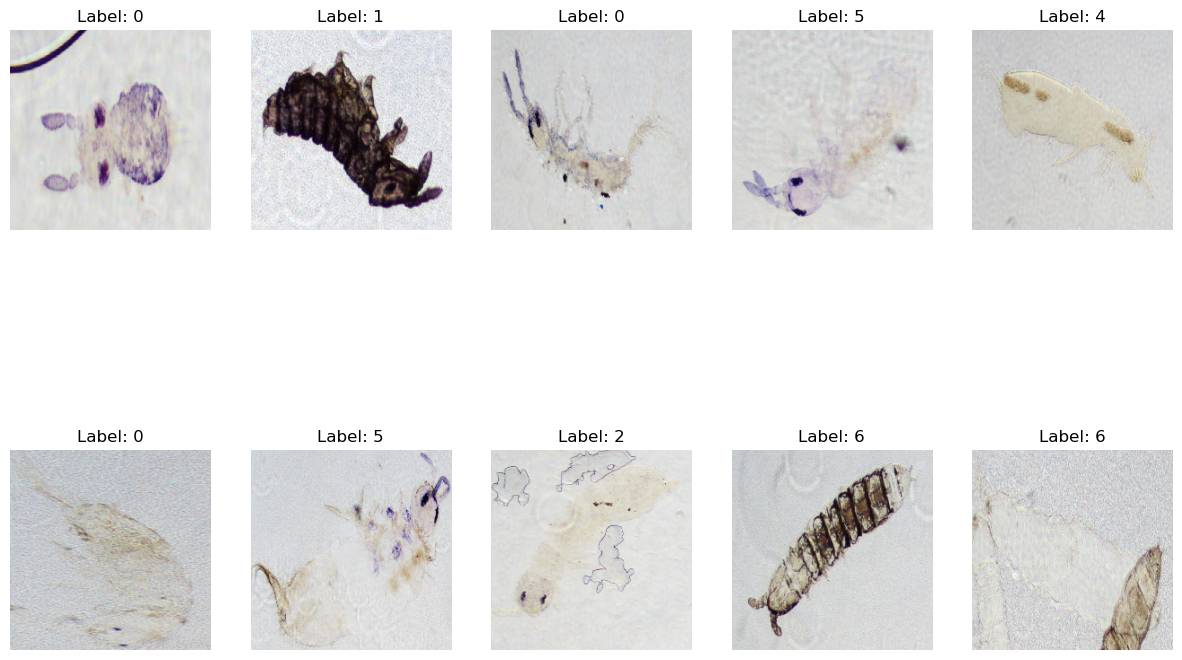

In [21]:
# Instancier le générateur pour la base sûre
train_generator = ImageLabelGenerator(base_sure_directory, batch_size=32, target_size=(224, 224))

# Obtenir le premier lot du générateur
images, labels = train_generator[0]

# Afficher 10 images du dataset
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 lignes et 5 colonnes pour afficher 10 images
    plt.imshow(images[i].astype('uint8'))
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')  # Désactive l'affichage des axes
plt.show()